**ML - Fall 2023 - Practical - 3**<br>
**Practical Homework 3 - Logistic Regression**

### Full Name : Ali Aghayari
### Student Number : 400104715
### Colab Link:
___

# P1: Introduction (10 points)
The dataset consists of several game result predictor (independent) variables and one target (dependent) variable, `win_or_defeat`. <br> Independent variables include the `spell_used`, `position`, `towers_damage`, `kill_death_ratio`, `controlling_time`, and so on.
  * spell_used
  * trap_used
  * character
  * position
  * location
  * assists
  * damage_amount
  * towers_damage
  * rooms_damage
  * deaths
  * money_total
  * kill_death_ratio
  * kills_total
  * level
  * controlling_time
  * total_damage
  * earned_damage
  * special_enemy_killed
  * room_kills
  * main_score
  * win_or_defeat

First, we perform data exploration to get a better understanding of the data. Then, we perform data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
data_link = "https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing"

In [2]:
!pip install typing-extensions --upgrade
!pip install ydata-profiling
!pip install gdown

  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
cudf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

In [4]:
!gdown 1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d

Downloading...
From: https://drive.google.com/uc?id=1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d
To: /kaggle/working/train.csv
100%|█████████████████████████████████████████| 493k/493k [00:00<00:00, 120MB/s]


KurtosisLoad the dataset as a dataframe. Then, check for any null values and remove the rows containing them. Finally, display the first 10 rows. Also check for duplicate rows and delete them, if there are any. Report some other metrics like `Kurtosis` and `Interquartile range (IQR)` (hint: search and read about ydata-profiling). **(P1-1: 5 points)**

In [5]:
DF = pd.read_csv("/kaggle/working/train.csv")

print("is null count :",DF.isnull().sum())
DF.dropna(inplace=True)
# print("is null count :",DF.isnull().sum())

print("count of duplicated rows : " ,DF.duplicated().sum())
print("we dont have any dupliacted row",end="\n\n\n")
# DF = DF.drop_duplicates()


print(DF.head())

n_DF = DF.select_dtypes(include=['number'])
kurtosisValues = n_DF.kurtosis()
IQR = n_DF.quantile(0.75) - n_DF.quantile(0.25)

print("Kurtosis:")
print(kurtosisValues)
print("\nInterquartile Range (IQR):")
print(IQR)

# profile = ProfileReport(DF, title="Profiling Report")
# profile.to_file("dataProfile.html")
# profile #couldn't find a more optimized usage of this library method

is null count : Unnamed: 0              0
spell_used              0
trap_used               0
character               0
position                0
location                1
assists                 1
damage_amount           0
towers_damage           0
rooms_damage            0
deaths                  0
money_total             0
kill_death_ratio        1
kills_total             0
level                   0
controlling_time        0
total_damage            0
earned_damage           0
special_enemy_killed    0
room_kills              0
main_score              0
win_or_defeat           0
dtype: int64
count of duplicated rows :  0
we dont have any dupliacted row


   Unnamed: 0  spell_used  trap_used    character   position       location  \
0           0           4         12  TwistedFate  Side.blue  Lane.top_lane   
2           2           4         12        Ziggs  Side.blue  Lane.bot_lane   
3           3           4          7        Senna   Side.red  Lane.bot_lane   
5           5      

Calculate the mean, standard deviation, min and max value for each non object column. **(P1-2: 5 points)**

In [6]:
DF.describe()

,Unnamed: 0,spell_used,trap_used,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score
count,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000
mean,2308.996098,6.707782,8.430739,8.189031,2639.487752,9382.315847,2639.487752,5.740733,10865.129850,3.602712,5.702580,13.826794,18.926295,117652.268806,21465.087145,120.789725,1.032517,30.158899
std,1331.809470,3.976734,4.312468,5.639756,3194.783198,10101.251927,3194.783198,3.020094,3473.747695,3.767723,4.317011,2.373998,14.080420,70408.498868,9907.871328,83.739102,1.313180,20.875652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3093.000000,0.000000,0.000000,6.000000,0.000000,5401.000000,2674.000000,0.000000,0.000000,1.000000
25%,1156.000000,4.000000,4.000000,4.000000,403.000000,2089.000000,403.000000,3.000000,8313.000000,1.300000,2.000000,12.000000,9.000000,67911.000000,14269.000000,32.000000,0.000000,16.000000
50%,2309.000000,4.000000,11.000000,7.000000,1656.000000,5761.000000,1656.000000,5.000000,10479.000000,2.400000,5.000000,14.000000,17.000000,114753.000000,19862.000000,137.000000,1.000000,24.000000
75%,3462.000000,11.000000,12.000000,11.000000,3752.000000,13445.000000,3752.000000,8.000000,13051.000000,4.500000,8.000000,16.000000,26.000000,159956.000000,26898.000000,187.000000,2.000000,36.000000
max,4615.000000,21.000000,21.000000,41.000000,44162.000000,68474.000000,44162.000000,21.000000,28566.000000,33.000000,30.000000,18.000000,193.000000,499423.000000,78861.000000,440.000000,9.000000,174.000000


# P2: Data Exploration (30 points)
In this section, we perform some data exploration to get a better understanding of the data.

1- Show number of unique value for `location` column **(P2-1: 5 points)**

In [7]:
print(DF["location"].nunique() ,end = "\n\n")

print(DF["location"].value_counts())

5

location
Lane.jungle      978
Lane.top_lane    955
Lane.mid_lane    913
Lane.bot_lane    902
Lane.utility     865
Name: count, dtype: int64


2- Plot correlation matrix between features **(P2-2: 5 points)**

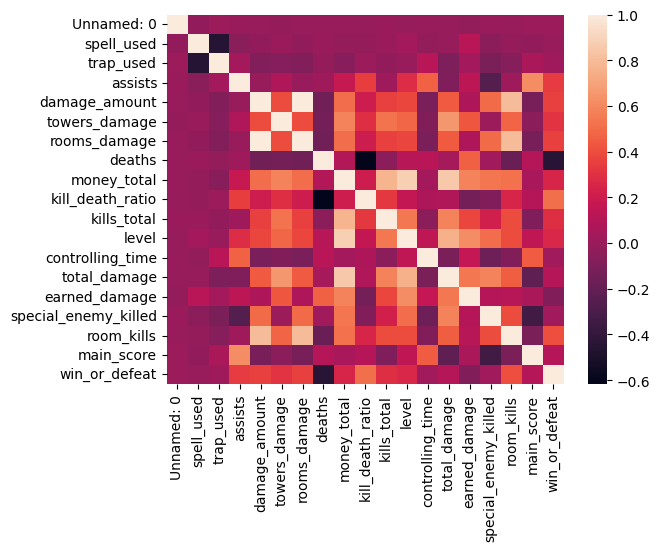

In [8]:
# label_encoder = preprocessing.LabelEncoder()
# for c in DF.columns :
#    if DF[c].dtype == 'object' or DF[c].dtype == "string":
#        DF[c] = label_encoder.fit_transform(DF[c])
# sns.heatmap(DF.corr())
# plt.show()


sns.heatmap(DF.select_dtypes(exclude=['object']).corr())
plt.show()

3- Plot bar plot of combined `position` and `location` columns (hint: use crosstab in pandas) **(P2-3: 5 points)**

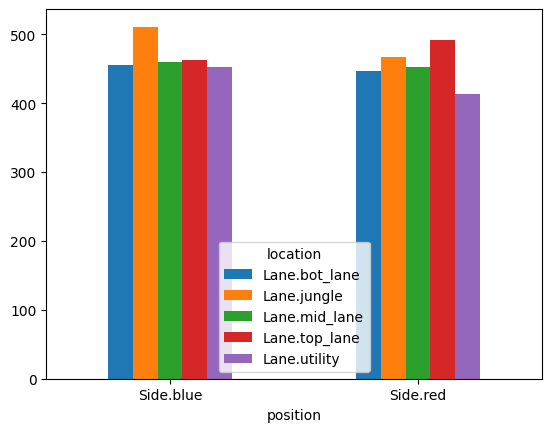

In [9]:
CT = pd.crosstab(DF.position, DF.location)
barplot = CT.plot.bar(rot=0)

4- Plot pie chart of `level` column **(P2-4: 5 points)**

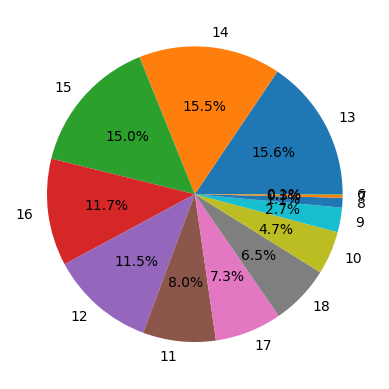

In [10]:
plt.pie(DF["level"].value_counts(), labels = DF["level"].value_counts().index , autopct = "%1.1f%%")
plt.show()

5- Plot box-plot on combination of `location` and `earned_damage` columns **(P2-5: 5 points)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


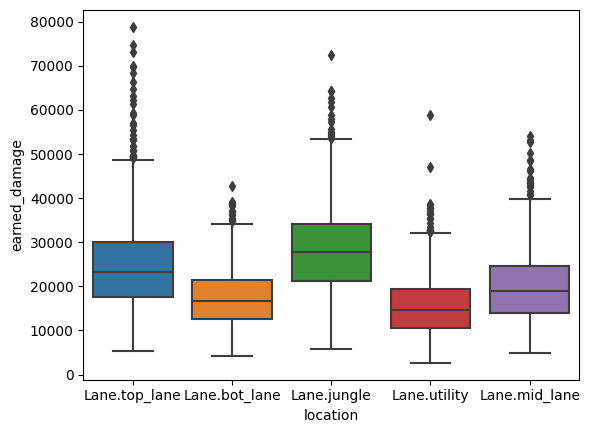

In [11]:
sns.boxplot(x = "location",y = "earned_damage" ,data = DF)
plt.show()

6- Plot histplot of `spell_used` column (10 bins). **(P2-6: 5 points)**

<Axes: >

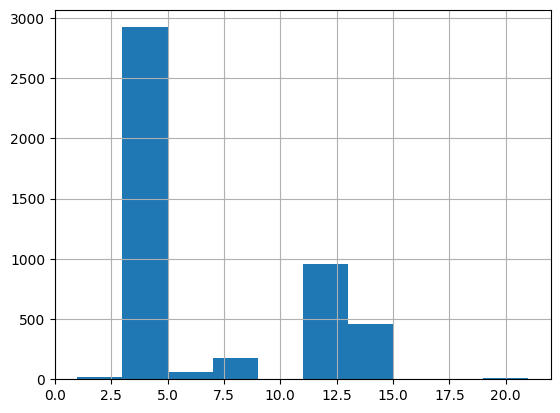

In [12]:
DF.spell_used.hist()

# P3: Pre-processing (15 points)
In this section, we perform some pre-processing to make the data ready for model.

First of all, in your heatmap, there are some variables that have very low correlation with your dependent variable. You can delete those features that their absulote value of correlation with dependent variable is less than 0.015. **(P3-1: 5 points)**

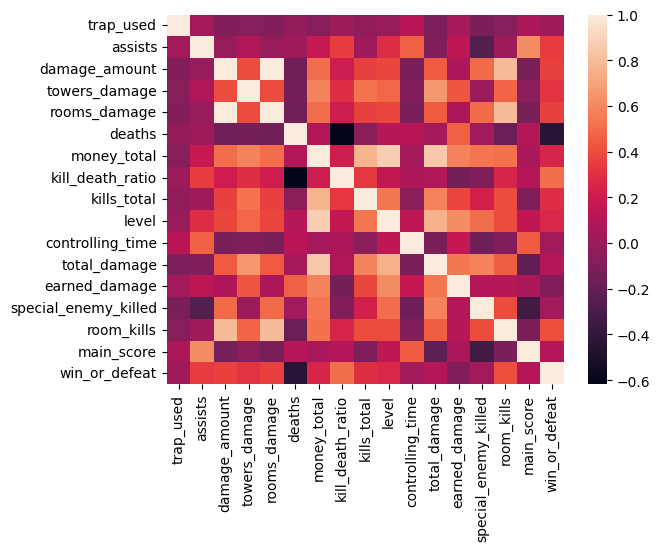

   trap_used  assists  damage_amount  towers_damage  rooms_damage  deaths  \
0         12      9.0           1862           5119          1862       9   
2         12      3.0            543           2754           543       4   
3          7      4.0           1547           1547          1547       6   
5         11      7.0           1564          16053          1564       4   
6         12      9.0          19665          20431         19665       3   

   money_total  kill_death_ratio  kills_total  level  controlling_time  \
0         9152          1.222222            2     13                19   
2         9014          1.750000            4     12                11   
3         8155          1.000000            2     12                14   
5        11536          3.500000            7     14                14   
6        10699          5.333333            7     12                11   

   total_damage  earned_damage  special_enemy_killed  room_kills  main_score  \
0         99

In [13]:
corr = DF.select_dtypes(exclude=['object']).corr()
high_corr_inedx = corr[abs(corr['win_or_defeat']) >= 0.015]['win_or_defeat'].index.tolist()
DF_filtered_sns = DF[high_corr_inedx]

sns.heatmap(DF_filtered_sns.corr())
plt.show()

high_corr_inedx += DF.select_dtypes(include=['object']).columns.to_list()
DF = DF[high_corr_inedx]
print(DF.head())

Next step is to encode labels. Columns that are not numeric ('string' or 'object'), can't be given to the model, so you should convert them to numeric values <br> (hint: use sklearn LabelEncoder). **(P3-2: 5 points)**

In [14]:
label_encoder = preprocessing.LabelEncoder()
for c in DF.columns :
    if DF[c].dtype == 'object':
        DF[c] = label_encoder.fit_transform(DF[c])
DF.head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

,trap_used,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat,character,position,location
0,12,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,False,129,0,3
2,12,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,False,153,0,0
3,7,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,False,105,1,0
5,11,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,True,99,1,1
6,12,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,True,153,0,0


now we need to normalize columns of the dataframe which causes our model to converge better and prevent focusing on some specific number of columns. we use 'Z normalization' for this purpose.

be careful not to normalize 'win_or_defeat' column!

In [15]:
# shouldn't we use .fit() on X_train instead of all of the DF
features = DF.columns[DF.columns != 'win_or_defeat']
scaler = StandardScaler()
DF[features] = scaler.fit_transform(DF[features])

DF.describe()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

,trap_used,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,character,position,location
count,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03,4.613000e+03
mean,1.139826e-16,1.417081e-16,-3.388671e-17,7.855556e-17,-3.388671e-17,-4.697931e-17,1.347767e-16,8.779739e-17,-8.009586e-17,1.563410e-16,2.368219e-17,-6.623312e-17,7.701525e-17,-1.501797e-17,-4.235839e-17,-5.545098e-17,-2.926580e-17,1.232244e-17,1.216841e-16
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00
min,-1.723270e+00,-1.452176e+00,-8.262764e-01,-9.289277e-01,-8.262764e-01,-1.901051e+00,-2.237633e+00,-9.563076e-01,-1.321099e+00,-3.297241e+00,-1.344303e+00,-1.594459e+00,-1.896787e+00,-1.442609e+00,-7.863575e-01,-1.396941e+00,-1.747295e+00,-9.851525e-01,-1.416887e+00
25%,-1.027537e+00,-7.428487e-01,-7.001196e-01,-7.220993e-01,-7.001196e-01,-9.075974e-01,-7.347703e-01,-6.112343e-01,-8.577650e-01,-7.695845e-01,-7.050480e-01,-7.065434e-01,-7.263788e-01,-1.060429e+00,-7.863575e-01,-6.783230e-01,-7.641335e-01,-9.851525e-01,-7.009161e-01
50%,5.958396e-01,-2.108531e-01,-3.078752e-01,-3.585406e-01,-3.078752e-01,-2.452946e-01,-1.111686e-01,-3.192491e-01,-1.627644e-01,7.296761e-02,-1.368215e-01,-4.118229e-02,-1.618169e-01,1.936017e-01,-2.476456e-02,-2.950598e-01,-2.055189e-01,-9.851525e-01,1.505511e-02
75%,8.277505e-01,4.984744e-01,3.482655e-01,4.022397e-01,3.482655e-01,7.481594e-01,6.293224e-01,2.381771e-01,5.322361e-01,9.155198e-01,5.024333e-01,6.008979e-01,5.484025e-01,7.907591e-01,7.368283e-01,2.798348e-01,9.117105e-01,1.015071e+00,7.310263e-01
max,2.914949e+00,5.818430e+00,1.299838e+01,5.850571e+00,1.299838e+01,5.053127e+00,5.096164e+00,7.803248e+00,5.628907e+00,1.758072e+00,1.236416e+01,5.422813e+00,5.793589e+00,3.812375e+00,6.067979e+00,6.891124e+00,1.738460e+00,1.015071e+00,1.446998e+00


# P4: Regression Model (30 points)

Split the data to train, test, and validation using sklearn's `train_test_split`. Use 10% of the data for the testing phase, another 10% for the validation phase, and the remaining for the training phase.

In [16]:
y = DF['win_or_defeat']
X = DF.drop('win_or_defeat', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("X train : " ,X_train.shape ," y train : " ,y_train.shape)
print("X val : " ,X_val.shape ," y val : " ,y_val.shape)
print("X test : " ,X_test.shape ," y test : " ,y_test.shape)

X train :  (3690, 19)  y train :  (3690,)
X val :  (461, 19)  y val :  (461,)
X test :  (462, 19)  y test :  (462,)


### Custom Regression Model

1- Complete custom logistic regression functions below **(P4-1: 10 points)**

In [17]:
from sklearn.metrics import accuracy_score

class CustomLogisticRegression():
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias ,self.weights = None ,None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, X, y):
        m = X.shape[0]
        predictions = self.predict_(X)
        return (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    def loss_backward(self, X, y):
        m = X.shape[0]
        predictions = self.predict_(X)
        dz = predictions - y
        return (1 / m) * np.dot(X.T, dz) , (1 / m) * np.sum(dz)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.num_iterations):
            dw, db = self.loss_backward(X, y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return np.where(predictions >= 0.5, 1, 0)

### Torch Regression Model

2- Implement the Logistic Regression Model. This time, use Pytorch! **(P4-2: 10 points)**

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

class TorchLogisticRegression():
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.model = None

    def loss(self, y_pred, y_true):
        criterion = nn.BCEWithLogitsLoss()
        return criterion(y_pred, y_true)

    def predict(self, X):
        with torch.no_grad():
            outputs = self.model(X)
            predicted = (torch.sigmoid(outputs) >= 0.5).float()
        return predicted.numpy()

    def fit(self, X_train, y_train):
        input_size = X_train.shape[1]
        self.model = nn.Linear(input_size, 1)
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)
        x_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)  # Reshaping directly
        for epoch in range(self.num_iterations):
            optimizer.zero_grad()
            outputs = self.model(x_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss.backward()
            optimizer.step()

### SK-Learn Regression Model

3- Now train a Logistic Regression using SK-Learn **(P4-3: 5 points)**

In [19]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter = 1000)
logisticRegr.fit(X_train, y_train)
y_pred_SKlean = logisticRegr.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

### Predicting the output for the testing data
4- Train Custom Logistic Regression and Torch Logistic Regression models and then Predict the `Outcome` for the testing samples using both models. **(P4-4: 5 points)**

In [20]:
customLogisticRegr =  CustomLogisticRegression(num_iterations = 1000)
customLogisticRegr.fit(X_train, y_train)
y_pred_custom = customLogisticRegr.predict(X_test)

torchLogisticRegr = TorchLogisticRegression(num_iterations = 10000)
torchLogisticRegr.fit(X_train.values, y_train.values)
X_test_tens = torch.FloatTensor(X_test.values)
y_pred_torch = torchLogisticRegr.predict(X_test_tens)

# P5: Evaluation (10 points)

1- Complete the metric codes. then evaluate all the models results using the implemented metrices and compare them. **(P5-1: 10 points)**

In [21]:
class classification_full_report():

    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def accuracy(self):
        return sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == pred) / len(self.y_true)

    def f1_score(self):
        precision = self.precision()
        recall = self.recall()
        return 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0
    
    def precision(self):
        true_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 1 and pred == 1)
        pred_positive = sum(1 for pred in self.y_pred if pred == 1)
        return true_positive / pred_positive if pred_positive != 0 else 0

    def recall(self):
        true_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 1 and pred == 1)
        real_positive = sum(1 for true in self.y_true if true == 1)
        return true_positive / real_positive if real_positive != 0 else 0

    def confusion_matrix(self):
        T_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 1 and pred == 1)
        T_negative = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 0 and pred == 0)
        F_positive = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 0 and pred == 1)
        F_negative = sum(1 for true, pred in zip(self.y_true, self.y_pred) if true == 1 and pred == 0)
        return [[T_negative, F_positive], [F_negative, T_positive]]
    
    
report_SKlearn = classification_full_report(y_test, y_pred_SKlean)
print("SKlearn accuracy:", report_SKlearn.accuracy())
print("SKlearn F1 score:", report_SKlearn.f1_score())
print("SKlearn precision:", report_SKlearn.recall())
print("SKlearn recall:", report_SKlearn.recall())
print("SKlearn confusion matrix:", report_SKlearn.confusion_matrix())

print("\n\n")
report_custom = classification_full_report(y_test, y_pred_custom)
print("customLogisticReg accuracy:", report_custom.accuracy())
print("customLogisticReg F1 score:", report_custom.f1_score())
print("customLogisticReg precision:", report_custom.recall())
print("customLogisticReg recall:", report_custom.recall())
print("customLogisticReg confusion matrix:", report_SKlearn.confusion_matrix())

print("\n\n")
report_torch = classification_full_report(y_test, y_pred_torch)
print("torchLogisticReg accuracy:", report_torch.accuracy())
print("torchLogisticReg F1 score:", report_torch.f1_score())
print("torchLogisticReg precision:", report_torch.recall())
print("torchLogisticReg recall:", report_torch.recall())
print("torchLogisticReg confusion matrix:", report_torch.confusion_matrix())

SKlearn accuracy: 0.829004329004329
SKlearn F1 score: 0.8271334792122539
SKlearn precision: 0.8076923076923077
SKlearn recall: 0.8076923076923077
SKlearn confusion matrix: [[194, 34], [45, 189]]



customLogisticReg accuracy: 0.8181818181818182
customLogisticReg F1 score: 0.8149779735682819
customLogisticReg precision: 0.7905982905982906
customLogisticReg recall: 0.7905982905982906
customLogisticReg confusion matrix: [[194, 34], [45, 189]]



torchLogisticReg accuracy: 0.829004329004329
torchLogisticReg F1 score: 0.8278867102396514
torchLogisticReg precision: 0.811965811965812
torchLogisticReg recall: 0.811965811965812
torchLogisticReg confusion matrix: [[193, 35], [44, 190]]


# P6: Neural Net (5 points)

Implement a neural net containing the following layers: LSTM, CNN, Pooling and Dense (Linear). Train the neural network on the training data and tune its hyperparameters using the validation data. Finally, print a classification report indicating how well its doing on the testing data. **(P6-1: 5 points)**

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

X_train_ = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_ = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_ = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(64, input_shape=X_train_.shape[1:], return_sequences=True))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

history = model.fit(X_train_, y_train, epochs=20, batch_size=32, validation_data=(X_val_, y_val), callbacks=[early_stopping, model_checkpoint])
best_model = tf.keras.models.load_model('best_model.h5')
test_loss, test_accuracy = best_model.evaluate(X_test_, y_test)

y_pred_classes = np.argmax(best_model.predict(X_test_), axis=1)

print("\n\n")
report_NN = classification_full_report(y_test, y_pred_classes)
print("NNlogisticReg accuracy:", report_NN.accuracy())
print("NNlogisticReg F1 score:", report_NN.f1_score())
print("NNlogisticReg precision:", report_NN.recall())
print("NNlogisticReg recall:", report_NN.recall())
print("NNlogisticReg confusion matrix:", report_NN.confusion_matrix())

Epoch 1/20
116/116 [==============================] - 12s 12ms/step - loss: 0.4440 - accuracy: 0.7932 - val_loss: 0.3837 - val_accuracy: 0.8156
Epoch 2/20
 28/116 [======>.......................] - ETA: 0s - loss: 0.4003 - accuracy: 0.8103

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


116/116 [==============================] - 1s 6ms/step - loss: 0.3580 - accuracy: 0.8404 - val_loss: 0.3698 - val_accuracy: 0.8200
Epoch 3/20
116/116 [==============================] - 1s 6ms/step - loss: 0.3480 - accuracy: 0.8472 - val_loss: 0.3728 - val_accuracy: 0.8178
Epoch 4/20
116/116 [==============================] - 1s 7ms/step - loss: 0.3453 - accuracy: 0.8491 - val_loss: 0.3636 - val_accuracy: 0.8351
Epoch 5/20
116/116 [==============================] - 1s 6ms/step - loss: 0.3338 - accuracy: 0.8482 - val_loss: 0.3570 - val_accuracy: 0.8330
Epoch 6/20
116/116 [==============================] - 1s 6ms/step - loss: 0.3298 - accuracy: 0.8501 - val_loss: 0.3583 - val_accuracy: 0.8330
Epoch 7/20
116/116 [==============================] - 1s 6ms/step - loss: 0.3258 - accuracy: 0.8553 - val_loss: 0.3777 - val_accuracy: 0.8221
Epoch 8/20
116/116 [==============================] - 1s 6ms/step - loss: 0.3192 - accuracy: 0.8599 - val_loss: 0.3675 - val_accuracy: 0.8243
Epoch 9/20
116/11